In [1]:
# 现有部分餐饮客户的消费数据,见表‘consumption_data.xls’文件,
# 文件中R表示最近一次消费时间间隔,F表示消费频率,M表示消费总金额。
# 使用K-Means聚类算法，设定聚类个数为3，最大迭代次数为500，距离函数采用欧式距离。
# 问题1：读取consumption_data.xls文件，完成聚类中心、个数结果截图。(10分)
# 问题2：给出三个客户分群的概率密度图的代码设计。(10分)
# 问题3：结合上述密度图，给出三类客户分群特征描述，并对比分析。(10分)

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# 读取Excel文件
data = pd.read_excel("consumption_data.xls")

# 显示数据的前几行
data.head()

,Id,R,F,M
0,1,27,6,232.61
1,2,3,5,1507.11
2,3,4,16,817.62
3,4,3,11,232.81
4,5,14,7,1913.05


In [4]:
X = data[['R', 'F', 'M']]

In [5]:
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=42)
kmeans.fit(X)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3, random_state=42)

In [6]:
# 获取聚类中心和每个样本的聚类标签
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
print("聚类中心:\n", cluster_centers)

聚类中心:
 [[  16.13375796    8.09766454  536.14876858]
 [  17.2224622    11.09287257 1528.02360691]
 [  28.33333333   14.83333333 6330.23833333]]


In [7]:
# 每个类的样本数量
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("每个类的样本数量:\n", cluster_counts)

每个类的样本数量:
 {0: 471, 1: 463, 2: 6}


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
plt.rcParams['font.sans-serif'] = ['SimSun']  # 使用中文宋体字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [16]:
data['Cluster'] = labels

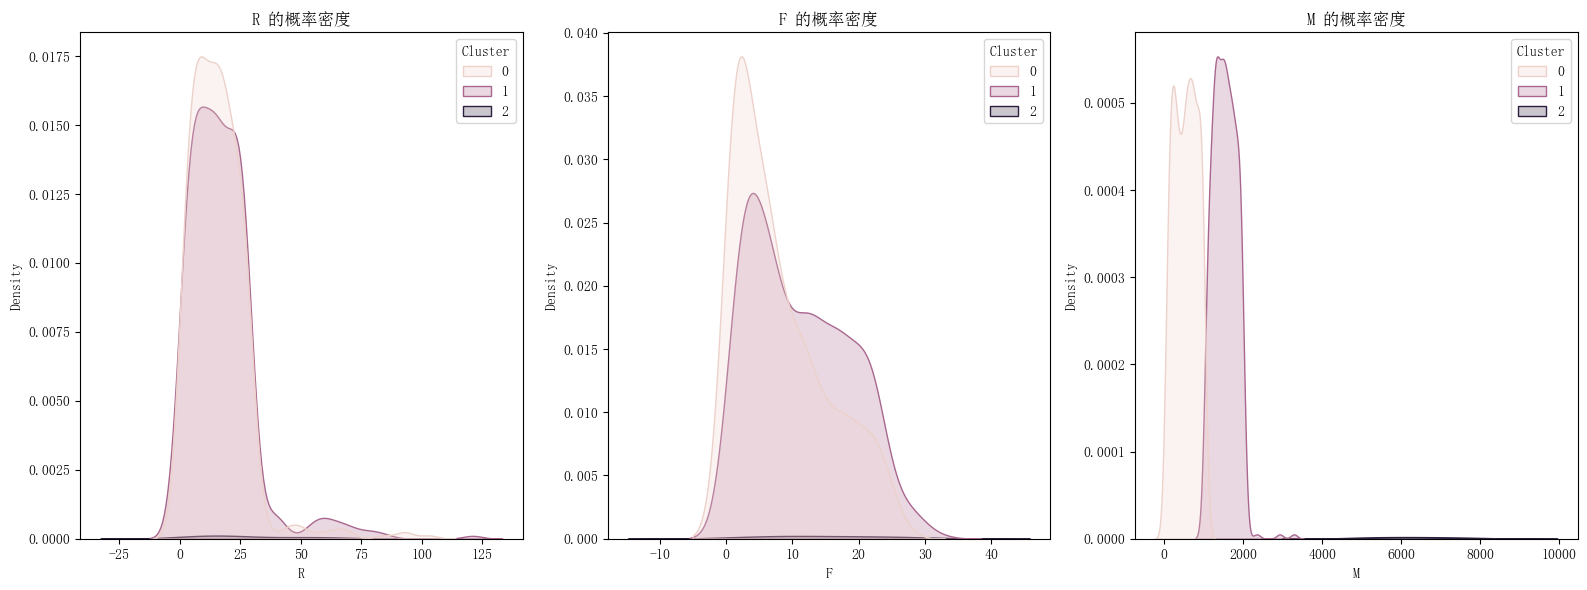

In [19]:
plt.figure(figsize=(16, 6))

for i, feature in enumerate(['R', 'F', 'M']):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(data=data, x=feature, hue="Cluster", fill=True)
    plt.title(f'{feature} 的概率密度')

plt.tight_layout()
plt.show()